<a href="https://colab.research.google.com/github/vachkim/LECTURE/blob/master/MINING/Lec_TOPICMODELING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
docs = ['바나나 사과 포도 포도',
        '사과 포도',
        '포도 바나나',
        '짜장면 짬뽕 탕수육',
        '볶음밥 탕수육',
        '짜장면 짬뽕',
        '된장찌개 김치찌개 김치 비빔밥',
        '김치 된장 비빔밥',
        '비빔밥 김치',
        '사과 볶음밥 김치 된장']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

n_topic = 3
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(docs)
svd = TruncatedSVD(n_components=n_topic)
u_sigma = svd.fit_transform(tfidf)
svd.components_

array([[ 0.39094311,  0.08663945,  0.2634605 ,  0.08663945,  0.31533599,
         0.1677167 ,  0.33012626,  0.42118555,  0.01907605,  0.01907605,
         0.05422822,  0.58747296],
       [ 0.49683512,  0.13720069,  0.26962551,  0.13720069, -0.29774469,
         0.10773075,  0.49275818, -0.18567019,  0.02131272,  0.02131272,
         0.04450862, -0.51222803],
       [-0.06285924, -0.02901254, -0.00762375, -0.02901254, -0.01957621,
         0.19210545, -0.09004258,  0.00851823,  0.60658392,  0.60658392,
         0.46061907, -0.02794911]])

In [ ]:
vocab = tfidf_vect.get_feature_names()
n = 3
for idx, topic in enumerate(svd.components_):
  print('topic %d:' %(idx), [(vocab[i],topic[i].round(5)) for i in topic.argsort()[:-n -1:-1]])

topic 0: [('포도', 0.58747), ('사과', 0.42119), ('김치', 0.39094)]
topic 1: [('김치', 0.49684), ('비빔밥', 0.49276), ('된장', 0.26963)]
topic 2: [('짬뽕', 0.60658), ('짜장면', 0.60658), ('탕수육', 0.46062)]


In [ ]:
for i in range(len(vocab)):
  print('{}:{}.'.format(vocab[i], svd.components_.T[i]))

김치:[ 0.39094311  0.49683512 -0.06285924].
김치찌개:[ 0.08663945  0.13720069 -0.02901254].
된장:[ 0.2634605   0.26962551 -0.00762375].
된장찌개:[ 0.08663945  0.13720069 -0.02901254].
바나나:[ 0.31533599 -0.29774469 -0.01957621].
볶음밥:[0.1677167  0.10773075 0.19210545].
비빔밥:[ 0.33012626  0.49275818 -0.09004258].
사과:[ 0.42118555 -0.18567019  0.00851823].
짜장면:[0.01907605 0.02131272 0.60658392].
짬뽕:[0.01907605 0.02131272 0.60658392].
탕수육:[0.05422822 0.04450862 0.46061907].
포도:[ 0.58747296 -0.51222803 -0.02794911].


In [ ]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cosine_similarity(a,b):
  return dot(a,b)/(norm(a)*norm(b))

def calc_similarity_matrix(vectors):
  n_word = len(vectors)
  similarity_matrix = np.zeros((n_word, n_word))

  for i in range(n_word):
    for j in range(i,n_word):
      similarity_matrix[j,i] = cosine_similarity(vectors[i],vectors[j]).round(4)
  return similarity_matrix

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_similarity(similarity_matrix):
  uniform_data = similarity_matrix
  mask = np.triu(np.ones_like(similarity_matrix, dtype=np.bool))
  plt.rcParams['figure.figsize'] = [8,6]
  ax = sns.heatmap(uniform_data,mask=mask,
                   annot = True, fmt ='.2f', annot_kws={'size':8},
                   cmap='coolwarm')

In [ ]:
print(vocab)

['김치', '김치찌개', '된장', '된장찌개', '바나나', '볶음밥', '비빔밥', '사과', '짜장면', '짬뽕', '탕수육', '포도']


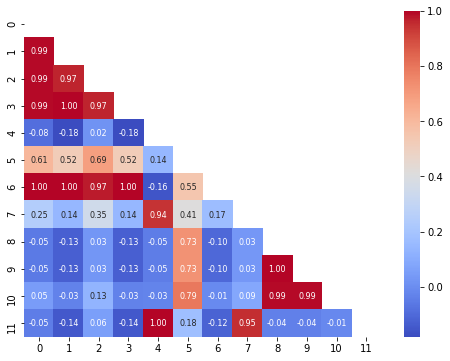

In [ ]:
word_vectors=svd.components_.T
word_similarity_matirx = calc_similarity_matrix(word_vectors)
visualize_similarity(word_similarity_matirx)

In [ ]:
%matplotlib inline
import matplotlib.font_manager as fm
import matplotlib
fontprop = fm.FontProperties(fname='./data/malgun.ttf',size=12)

In [ ]:
from sklearn.manifold import TSNE
import numpy as np
vectors = word_vectors
labels = tfidf_vect.get_feature_names()
def visualize_vectors(vectors, labels):
  tsne = TSNE(n_components=2, random_state = 0, n_iter=10000, perplexity=2)
  np.set_printoptions(suppress=True)
  T = tsne.fit_transform(vectors)

  plt.figure(figsize = (10,6))
  plt.scatter(T[:,0],T[:,1],c='orange',edgecolors='r')
  for label, x, y in zip(labels,T[:,0],T[:,1] ):
    plt.annotate(label, xy=(x+1,y+1),xytext=(0,0),
                 textcoords = 'offset points',
                 fontproperties=fontprop)

In [ ]:
visualize_vectors(vectors,labels)